# Digit Classification with KNN and Naive Bayes

This was a project for my machine learning class

In [9]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [10]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Show a 10x10 grid that visualizes 10 examples of each digit.

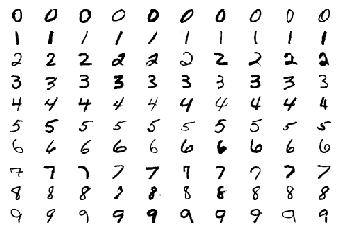

In [11]:
fig, axs = plt.subplots(10, 10) #sets up Nx10 grid
for i in range(10):
    yy = np.where(Y == str(i))[0][:10] #Get N indicies of the number of interest

    #add image to its place
    j = 0
    for index in yy: 
        axs[i, j].imshow(np.reshape(X[index], (28,28)), interpolation='nearest', cmap = "gray_r") 
        axs[i, j].axis("off")
        j += 1
plt.show()


### Produce k-Nearest-Neighbors model with k = [1,3,5,7,9].  

Evaluate and show the performance of each model. For the 1-Nearest Neighbor model, show precision, recall, and F1 for each label. 


In [12]:
k_values = [1, 3, 5, 7, 9]

for k in k_values:
    # Fit model when k = 1 and output extra analysis
    if k == 1:
        K1 = KNeighborsClassifier(n_neighbors=k).fit(mini_train_data, mini_train_labels)
        predictions = K1.predict(dev_data)
        report = classification_report(dev_labels, predictions)
        errors = []
        for i in range(len(dev_labels)):
            if dev_labels[i] != predictions[i]:
                errors.append(dev_labels[i])
        print("Error rate when k = "+str(k)+" is "+str(len(errors)/len(dev_data)) + \
              ", and "+max(set(errors), key = errors.count)+" is the most mislabeled.")
        print(report)

    # Fit models when k >1
    else:
        K2 = KNeighborsClassifier(n_neighbors=k).fit(mini_train_data, mini_train_labels)
        predictions = K2.predict(dev_data)
        errors = []
        for i in range(len(dev_labels)):
            if dev_labels[i] != predictions[i]:
                errors.append(dev_labels[i])
        print("Error rate when k = "+str(k)+" is "+str(len(errors)/len(dev_data)) + \
              ", and "+max(set(errors), key = errors.count)+" is the most mislabeled.")



Error rate when k = 1 is 0.116, and 2 is the most mislabeled.
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

Error rate when k = 3 is 0.124, and 8 is the most mislabeled.
Error rate when k = 5 is 0.118, and 2 is the most mislabeled.
Error rate when k = 7 is 0.123, and 2 is the most misla

### Produce 1-Nearest Neighbor models using training data of various sizes.  

Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

In [25]:
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []

# Train a model for each size of data
for size in train_sizes:
    start = time.time()
    K1 = KNeighborsClassifier(n_neighbors=1).fit(train_data, train_labels)
    predictions = K1.predict(dev_data[:size])

    # Count number of errors and calculate accuracies
    errors = []
    for i in range(min(size, len(dev_labels))):
        if dev_labels[i] != predictions[i]:
            errors.append(dev_labels[i])
    print("Error rate when size = "+str(size)+" is "+str(len(errors)/size))
    accuracies.append((size-len(errors))/size)
    end = time.time()
    print("Elapesed time for "+str(size)+" observations is "+str(end-start)+" seconds or "+str((end-start)/60)+" minutes.")

print(accuracies)

Error rate when size = 100 is 0.02
Elapesed time for 100 observations is 47.23378896713257 seconds or 0.7872298161188761 minutes.
Error rate when size = 200 is 0.035
Elapesed time for 200 observations is 54.242591857910156 seconds or 0.9040431976318359 minutes.
Error rate when size = 400 is 0.035
Elapesed time for 400 observations is 67.64456796646118 seconds or 1.1274094661076863 minutes.
Error rate when size = 800 is 0.02875
Elapesed time for 800 observations is 95.25564813613892 seconds or 1.5875941356023153 minutes.
Error rate when size = 1600 is 0.018125
Elapesed time for 1600 observations is 107.99214196205139 seconds or 1.7998690327008566 minutes.
Error rate when size = 3200 is 0.0090625
Elapesed time for 3200 observations is 107.93150806427002 seconds or 1.7988584677378336 minutes.
Error rate when size = 6400 is 0.00453125
Elapesed time for 6400 observations is 108.11047697067261 seconds or 1.8018412828445434 minutes.
Error rate when size = 12800 is 0.002265625
Elapesed time fo

### Produce a regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. 

In [14]:
accuracies = [0.98,0.965,0.965,0.97125,0.981875,0.9909375,0.99546875,0.997734375,0.9988671875] # Y
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600] # X
odds = [i/(1-i) for i in accuracies] # Y

R-squared standard model: 0.54


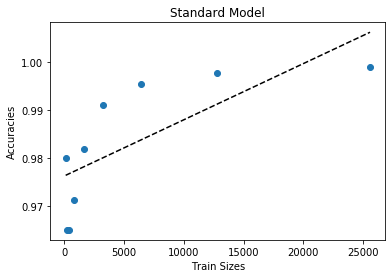

The estimated accuracy for 60000 training points is 1.0464348933893306
The estimated accuracy for 120000 training points is 1.1166064492908208
The estimated accuracy for 1000000 training points is 2.1457892691793443





R-squared for log sizes: 0.73


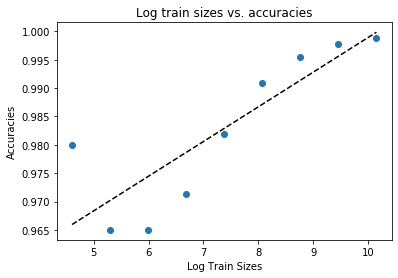

The estimated accuracy for 60000 training points is 367.8106324657777
The estimated accuracy for 120000 training points is 734.6834729418389
The estimated accuracy for 1000000 training points is 6115.485133257403





R-squared for log sizes vs. odds: 0.64


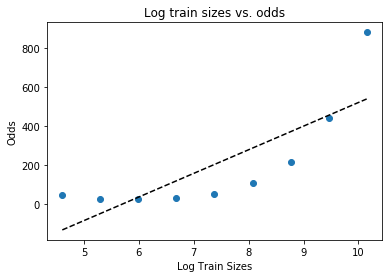

The estimated accuracy for 60000 training points is 0.9999998621639768
The estimated accuracy for 120000 training points is 0.9999999310852483
The estimated accuracy for 1000000 training points is 0.999999991730574





R-squared for odds: 1.00


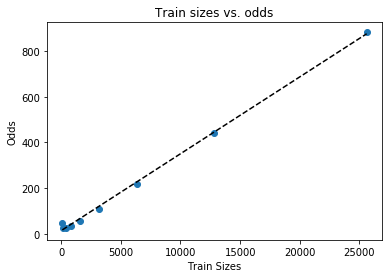

The estimated accuracy for 60000 training points is 0.9995081755520061
The estimated accuracy for 120000 training points is 0.9997531893050895
The estimated accuracy for 1000000 training points is 0.9999702871842772







In [15]:
train_sizes = np.array(train_sizes).reshape(-1, 1)
predict_on = np.array([60000, 120000, 1000000]).reshape(-1, 1)
accuracies = np.array(accuracies).reshape(-1,1)
x = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600] # Unshaped train_sizes
y = [0.98,0.965,0.965,0.97125,0.981875,0.9909375,0.99546875,0.997734375,0.9988671875] # Unshaped accuracies

### train_sizes vs. accuracies
regr = LinearRegression()
regr.fit(train_sizes, accuracies)
predictions = regr.predict(accuracies)
print('R-squared standard model: %.2f'% regr.score(train_sizes, accuracies))

# plot a graph
coef = np.polyfit(x, y, 1)
fn_line = np.poly1d(coef)
plt.plot(x, y, 'o', x, fn_line(x), '--k')
plt.title("Standard Model")
plt.xlabel("Train Sizes")
plt.ylabel("Accuracies")
plt.show()

# Predict
new_pred = regr.predict(predict_on)
for i in range(len(predict_on)):
    print("The estimated accuracy for "+ str(predict_on[i][0])+ " training points is "+ str(new_pred[i][0]))
print('''



''')


### log trin_sizes vs. accuracies
log_train_sizes = [np.log(i)[0] for i in train_sizes]
regr = LinearRegression()
regr.fit(np.array(log_train_sizes).reshape(-1,1), accuracies)
predictions = regr.predict(accuracies)
print('R-squared for log sizes: %.2f'% regr.score(np.array(log_train_sizes).reshape(-1,1), accuracies))

# plot a graph
coef = np.polyfit(log_train_sizes, y, 1)
fn_line = np.poly1d(coef)
plt.plot(log_train_sizes, y, 'o', log_train_sizes, fn_line(log_train_sizes), '--k')
plt.title("Log train sizes vs. accuracies")
plt.xlabel("Log Train Sizes")
plt.ylabel("Accuracies")
plt.show() 

# Predict
new_pred = regr.predict(predict_on)
for i in range(len(predict_on)):
    print("The estimated accuracy for "+ str(predict_on[i][0])+ " training points is "+ str(new_pred[i][0]))
print('''



''')


### log train_sizes vs. odds
odds = [a/(1-a) for a in y]
regr = LinearRegression()
regr.fit(np.array(log_train_sizes).reshape(-1,1), np.array(odds).reshape(-1,1))
predictions = regr.predict(regr.predict(np.array(odds).reshape(-1,1)))
print('R-squared for log sizes vs. odds: %.2f'% regr.score(np.array(log_train_sizes).reshape(-1,1), odds))

#plot a graph
# note: the graph shows train_sizes vs. odds, NOT train_sizes vs. accuracy
coef = np.polyfit(log_train_sizes, odds, 1)
fn_line = np.poly1d(coef)
plt.plot(log_train_sizes, odds, 'o', log_train_sizes, fn_line(log_train_sizes), '--k')
plt.title("Log train sizes vs. odds")
plt.xlabel("Log Train Sizes")
plt.ylabel("Odds")
plt.show()

# Predict
# Final printed answer is accuracy, not odds
new_pred = regr.predict(predict_on)
un_odds = [i[0]/(1+i[0]) for i in new_pred]
for i in range(len(predict_on)):
    print("The estimated accuracy for "+ str(predict_on[i][0])+ " training points is "+ str(un_odds[i]))
print('''



''')    



### trian_sizes vs. odds
regr = LinearRegression()
regr.fit(train_sizes, odds)
predictions = regr.predict(np.array(odds).reshape(-1,1))
print('R-squared for odds: %.2f'% regr.score(train_sizes, odds))

# plot a graph
# note: the graph shows train_sizes vs. odds, NOT train_sizes vs. accuracy
coef = np.polyfit(x, odds, 1)
fn_line = np.poly1d(coef)
plt.plot(x, odds, 'o', x, fn_line(x), '--k')
plt.title("Train sizes vs. odds")
plt.xlabel("Train Sizes")
plt.ylabel("Odds")
plt.show()

# Predict
# Final printed answer is accuracy, not odds
new_pred = regr.predict(predict_on)
un_odds = [(i)/(1+i) for i in new_pred]
for i in range(len(predict_on)):
    print("The estimated accuracy for "+ str(predict_on[i][0])+" training points is "+ str(un_odds[i]))
print('''



''')    


**In the first model, the train_sizes vs. accuracies, the estimated accuracies for all the large training sizes were greater than 1 (which is impossible) and an R-squared of .54. The graph seemed to be a logrithmic, rather than linear curve, so I took the log of train_sizes and ran the model again.**

**The second model (log of train_sizes vs. accuracies) improved on the first, with an R-squared of .73. The line does seem to fit the data better. However, the results are well over 1.**

**The third model looks at log of accuracies vs. odds. Odds is a transformation of accuracies, which scales them from one to infinity rather than from zero to one using this formula: odds(y) = y/(1-y). The R-squared value decreased a to .63. Here, the output below the graph is accuracy, not odds. The accuracies are now within the range of possibility.**

**The final model, train_sizes vs. odds, gives the best R-squared of almost 1. Here, the output below the graph is accuracy, not odds. All of the accuracies are below 1.**

**There is a common trend in all these models: the accuracy increases with more data points, and we know that accuracy will approach 1 with more and more data.**

### Produce a 1-Nearest Neighbor model and show the confusion matrix. 

Which pair of digits does the model confuse most often? Show the images of these most often confused digits.


[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]


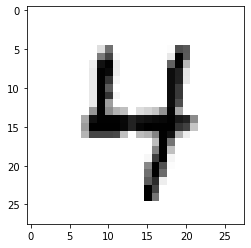

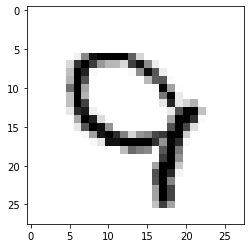

In [16]:
## This one determines which digits are most frequently confused for each other.
    
# Train model and produce matrix
K1 = KNeighborsClassifier(n_neighbors=1).fit(mini_train_data, mini_train_labels)
predictions = K1.predict(dev_data)
matrix = confusion_matrix(dev_labels, predictions)
print(matrix)

# Count mislabeled images and print an example of each of the most mislabeled
mislabel_count = []
m = 0 # Flag highest number of mistakes
for digit1 in range(10):
    for digit2 in range((digit1 +1), 10):
        confused_pair = matrix[digit1, digit2] + matrix[digit2, digit1]
        if confused_pair > m:
            m = confused_pair
            mislabel_count = [digit1, digit2]
        elif confused_pair == m: # if there is a tie
            mislabel_count.append(digit1)
            mislabel_count.append(digit2)
for label in mislabel_count:
    yy = np.where(Y==str(label))[0][:1]
    plt.imshow(np.reshape(X[yy], (28,28)), interpolation = 'nearest', cmap = "gray_r")
    plt.show()

[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]


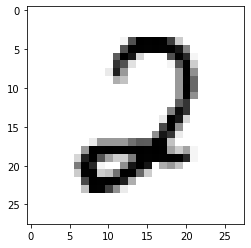

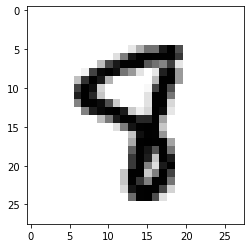

In [17]:
## This one determines which digits are most frequently misidentified.'''
    
# Train model and produce matrix
K1 = KNeighborsClassifier(n_neighbors=1).fit(mini_train_data, mini_train_labels)
predictions = K1.predict(dev_data)
matrix = confusion_matrix(dev_labels, predictions)
print(matrix)

# Count mislabeled images and print an example of each of the most mislabeled
mislabel_count = []
for num in matrix:
    mislabel_count.append(sum(num) - max(num))
max_mis = max(mislabel_count)
most_mislabeled = [i for i, j in enumerate(mislabel_count) if j == max_mis]
for label in most_mislabeled:
    yy = np.where(Y==str(label))[0][:1]
    plt.imshow(np.reshape(X[yy], (28,28)), interpolation = 'nearest', cmap = "gray_r")
    plt.show()


### Blurring

Implement a simplified Gaussian blur by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Apply your blur filter in 3 ways:
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracy resulting no filter and from each way you apply the filter.

In [18]:
# I assume it is okay to not blur the first or last line since they are all black.
# I assume k=1

# Filter the training data
train_filtered = []
for image in mini_train_data:
    train_filtered.append(image.copy())
for image in train_filtered:
    for i in range(28, len(image)-29):
        image[i] = mini_train_data[0][i]*.2 + mini_train_data[0][i-29]*.1 + mini_train_data[0][i-28]*.1 + mini_train_data[0][i-27]*.1 + mini_train_data[0][i-1]*.1 + mini_train_data[0][i+1]*.1 + mini_train_data[0][i+27]*.1 + mini_train_data[0][i+28]*.1 + mini_train_data[0][i+29]*.1

# Filter the dev data
dev_filtered = []
for image in dev_data:
    dev_filtered.append(image.copy())
for image in dev_filtered:
    for i in range(28, len(image)-29):
        image[i] = dev_data[0][i]*.2 + dev_data[0][i-29]*.1 + dev_data[0][i-28]*.1 + dev_data[0][i-27]*.1 + dev_data[0][i-1]*.1 + dev_data[0][i+1]*.1 + dev_data[0][i+27]*.1 + dev_data[0][i+28]*.1 + dev_data[0][i+29]*.1

# No filtered data
K1 = KNeighborsClassifier(n_neighbors=1).fit(mini_train_data, mini_train_labels)
predictions = K1.predict(dev_data)
errors = []
for i in range(len(dev_labels)):
    if dev_labels[i] != predictions[i]:
        errors.append(dev_labels[i])
print("When no data is filtered, accuracy is "+ str(len(errors)/len(mini_train_data)))

# Filtered training data but not dev data
K1 = KNeighborsClassifier(n_neighbors=1).fit(train_filtered, mini_train_labels)
predictions = K1.predict(dev_data)    
errors = []
for i in range(len(dev_labels)):
    if dev_labels[i] != predictions[i]:
        errors.append(dev_labels[i])
print("When only training data is filtered, accuracy is "+ str(len(errors)/len(mini_train_data)))

# Filtered dev data but not training data
K1 = KNeighborsClassifier(n_neighbors=1).fit(mini_train_data, mini_train_labels)
predictions = K1.predict(dev_filtered)
errors = []
for i in range(len(dev_labels)):
    if dev_labels[i] != predictions[i]:
        errors.append(dev_labels[i])
print("When only dev data is filtered, accuracy is "+ str(len(errors)/len(mini_train_data)))

# Filtered both training data and dev data
K1 = KNeighborsClassifier(n_neighbors=1).fit(train_filtered, mini_train_labels)
predictions = K1.predict(dev_filtered)
errors = []
for i in range(len(dev_labels)):
    if dev_labels[i] != predictions[i]:
        errors.append(dev_labels[i])
print("When all data is filtered, accuracy is "+ str(len(errors)/len(mini_train_data)))


When no data is filtered, accuracy is 0.116
When only training data is filtered, accuracy is 0.879
When only dev data is filtered, accuracy is 0.906
When all data is filtered, accuracy is 0.879


### Naive Bayes

For the first model, map pixel values to either 0 or 1. Use some reasonable threshold to separate white from black.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black. Use some reasonable thresholds to separate white from gray from black.  Use `MultinomialNB` to produce the model. 

In [19]:
##Pixels are black and white
bw_train = []
for image in mini_train_data:
    bw_train.append(image.copy())
for image in bw_train:
    for i in range(len(image)):
        if i <5:
            i = 0
        else:
            i = 1

bw_dev = []
for image in dev_data:
    bw_dev.append(image.copy())
for image in bw_dev:
    for i in range(len(image)):
        if i <5:
            i = 0
        else:
            i = 1

##Pixels are black, gray, and white
bgw_train = []
for image in mini_train_data:
    bgw_train.append(image.copy())
for image in bgw_train:
    for i in range(len(image)):
        if i < (1/3):
            i = 0
        elif i > (2/3):
            i = 2
        else:
            i = 1

bgw_dev = []
for image in dev_data:
    bgw_dev.append(image.copy())
for image in bgw_dev:
    for i in range(len(image)):
        if i < (1/3):
            i = 0
        elif i > (2/3):
            i = 2
        else:
            i = 1

# Run black and white binomial trial
bw = BernoulliNB()
bw.fit(bw_train, mini_train_labels)
print("In the black and white binomial trial, accuracy is "+ str(bw.score(bw_dev, dev_labels)))

# Run black, gray, and white multinomial trial
bgw = MultinomialNB()
bgw.fit(bgw_train, mini_train_labels)
print("In the black, gray, and white multinomial trial, accuracy is "+ str(bgw.score(bgw_dev, dev_labels)))


In the black and white binomial trial, accuracy is 0.809
In the black, gray, and white multinomial trial, accuracy is 0.807


**The multinomial model did not improve on the results because the multinomial model introduces more noise, which then leads to overfitting.**

### LaPlace Smoothing

Search across several values for the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  

In [20]:
#This cell makes Python ignore one of the useless warnings I was getting
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [21]:
def LaPlace_alpha(alphas):
    '''Tests various alphas to determine which one produces the best model.'''
    
    model = GridSearchCV(BernoulliNB(), alphas)
    model.fit(mini_train_data, mini_train_labels)
    print(model.cv_results_['mean_test_score'])
    return model.fit(mini_train_data, mini_train_labels)
    

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = LaPlace_alpha(alphas)
print()
print("Best alpha = ", nb.best_params_)

/Users/pattidegner/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[0.804 0.818 0.822 0.823 0.82  0.818 0.817 0.807 0.77 ]

Best alpha =  {'alpha': 0.01}


/Users/pattidegner/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


**The best alpha is .01 with an accuracy of .823. The accuracy of the model when it is near zero is .804. It makes sense that zero is not the best because then the boundary line between digits is less smooth (overfitted). The higher alpha smoothes the line and increases accuracy, but only to a point. After that it decreases accuracy as the line doesn't fit the data.** 

### Guassian Naive Bayes

Apply a simple fix to this model so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix. 

In [22]:
# Create basic model
model = GaussianNB()
model.fit(mini_train_data, mini_train_labels)
theta_list = []
for theta in model.theta_:
    theta_list.append(np.mean(theta))
sigma_list = []
for sigma in model.sigma_:
    sigma_list.append(np.mean(sigma))
print("Initial model has accuracy " + str(model.score(dev_data, dev_labels))+\
      "\n avg theta = "+str(np.mean(theta_list))+\
      " and avg sigma ="+str(np.mean(sigma_list)))

# Identify best smoothing
smoothed_list = []
var_smoothing_options = [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]
for smooth in var_smoothing_options:
    model2 = GaussianNB(var_smoothing = smooth)
    model2.fit(mini_train_data, mini_train_labels)
    smoothed_list.append(model2.score(dev_data, dev_labels))

# Create final model with smoothing factor that maximizes accuracy
best = smoothed_list.index(max(smoothed_list))
final_model = GaussianNB(var_smoothing = var_smoothing_options[best])
final_model.fit(mini_train_data, mini_train_labels)
theta_list = []
for theta in final_model.theta_:
    theta_list.append(np.mean(theta))
sigma_list = []
for sigma in final_model.sigma_:
    sigma_list.append(np.mean(sigma))
print()
print("Final model has accuracy " + str(final_model.score(dev_data, dev_labels))+\
      " with a smoothing factor of "+str(var_smoothing_options[best])+"\n avg theta = "+\
        str(np.mean(theta_list))+" and avg sigma ="+str(np.mean(sigma_list)))


Initial model has accuracy 0.593
 avg theta = 0.13233917230617082 and avg sigma =0.05299707504881932

Final model has accuracy 0.817 with a smoothing factor of 0.1
 avg theta = 0.13233917230617082 and avg sigma =0.07314040555249945


**The simple fix used here is to introduce a smoothing parameter to the Gaussian model. The average mean (theta) stays the same between the original model and the model with smoothing, but the varince (sigma) increases as the smoothing parameter increases.**

### Generate digit images

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

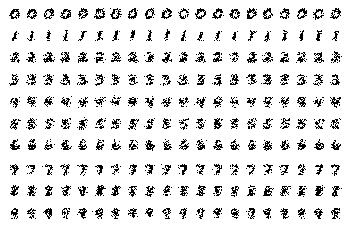

In [23]:
fig, axs = plt.subplots(10, 20) #sets up Nx10 grid
model = BernoulliNB().fit(X,Y)

# Generate images
for i in range(10):
    for j in range(20):
        num = np.exp(model.feature_log_prob_[i])
        for k, pix in enumerate(num):
            n = np.random.rand()
            if pix>n:
                num[k] = 1
            else:
                num[k] = 0

        # Put each image in its place
        axs[i, j].imshow(num.reshape(28,28), interpolation = "nearest", cmap = "gray_r")
        axs[i, j].axis("off")
plt.show()

**These images are hazier due to the randomization aspect. Most of them bear a resemblance to the actual number, but for some, especially 4, 5, and 9, it is hard to tell what the number is supposed to be. Even though the pixel is compared to a random number, we can still see what the number is supposed ot be, for the most part. This shows how powerful Naive Bayes can be.**

### Calibration Analysis

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

In [24]:
buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

# Create model. I assume alpha = .001 is okay.
model = BernoulliNB(alpha = .001).fit(mini_train_data, mini_train_labels)

for i in range(len(dev_data)):

    # Determine bin
    max_guess = max(model.predict_proba(dev_data)[i])
    bucket = 15
    for bins in buckets:
        if bucket < 10:
            continue
        elif bins < max_guess:
            continue
        else:
            bucket = buckets.index(bins)

    # Determine if correct label, if so add to correct bin
    guess = model.predict(dev_data)[i]
    true_label = dev_labels[i]
    if guess == true_label:
        correct[bucket] += 1

    # Add to total
    total[bucket]+=1


for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

p(pred) is 0.0000000000000 to 0.5000000000000    total =   0    accuracy = 0.000
p(pred) is 0.5000000000000 to 0.9000000000000    total =  31    accuracy = 0.355
p(pred) is 0.9000000000000 to 0.9990000000000    total =  67    accuracy = 0.433
p(pred) is 0.9990000000000 to 0.9999900000000    total =  59    accuracy = 0.458
p(pred) is 0.9999900000000 to 0.9999999000000    total =  46    accuracy = 0.652
p(pred) is 0.9999999000000 to 0.9999999990000    total =  62    accuracy = 0.774
p(pred) is 0.9999999990000 to 0.9999999999900    total =  33    accuracy = 0.788
p(pred) is 0.9999999999900 to 0.9999999999999    total =  43    accuracy = 0.791
p(pred) is 0.9999999999999 to 1.0000000000000    total = 659    accuracy = 0.938


**When the posterior probability is .9, the accuracy is only 43.3%, not 90% as we would expect from a strongly calibrated classifier. However, the accuracy increases as the posterior probability increases. This correlation indicates that this is a weakly calibrated classifier. If it were poorly classified, the accuracy would not increase with the posterior probability.**